In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
file_path = '/content/drive/MyDrive/data file/BostonHousing.csv'
housing_df = pd.read_csv(file_path)
housing_df = housing_df.rename(columns = {'CAT. MEDV':'CAT_MEDV'})
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


## Load the Amtrak Datset

In [16]:
file_path = '/content/drive/MyDrive/data file/Amtrak.csv'
amtrak_df = pd.read_csv(file_path, squeeze=True)  # 从CSV文件中读取数据，并将其存储在名为amtrak_df的DataFrame中
amtrak_df['Date'] = pd.to_datetime(amtrak_df['Month'], format='%d/%m/%Y')  # 将'Month'列中的日期字符串转换为日期时间格式，并存储在名为'Date'的新列中
amtrak_df['Date'] = pd.to_datetime(amtrak_df.Month, format='%d/%m/%Y')  # 同上一行代码，将结果存储在名为'Date'的新列中
amtrak_df.head()  # 显示amtrak_df的前几行数据
amtrak_df.dtypes  # 显示amtrak_df各列的数据类型


<ipython-input-16-219030005b6b>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  amtrak_df = pd.read_csv(file_path, squeeze=True)  # 从CSV文件中读取数据，并将其存储在名为amtrak_df的DataFrame中


Month                object
Ridership           float64
Date         datetime64[ns]
dtype: object

## Basic Plots:Line plot,Bar Chart,scatter polt

#matplotlib version

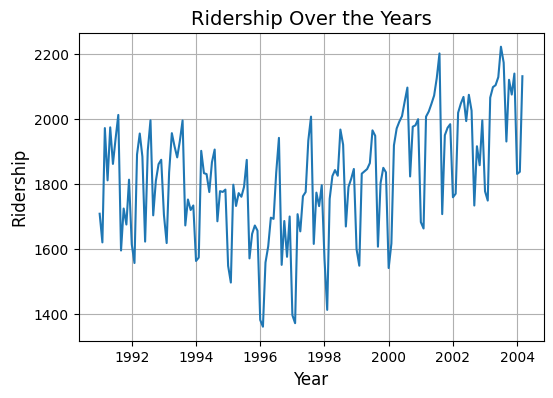

In [17]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(6, 4))  # 创建一个6x4英寸大小的图形窗口

plt.plot(amtrak_df['Date'], amtrak_df['Ridership'], color='C0')  # 绘制折线图，x轴为'Date'列，y轴为'Ridership'列，颜色为C0

plt.xlabel('Year', fontsize=12)  # 设置x轴标签为'Year'，字体大小为12
plt.ylabel('Ridership', fontsize=12)  # 设置y轴标签为'Ridership'，字体大小为12
plt.title('Ridership Over the Years', fontsize=14)  # 设置图表标题为'Ridership Over the Years'，字体大小为14

plt.grid(True)  # 显示网格线
plt.show()  # 显示图表


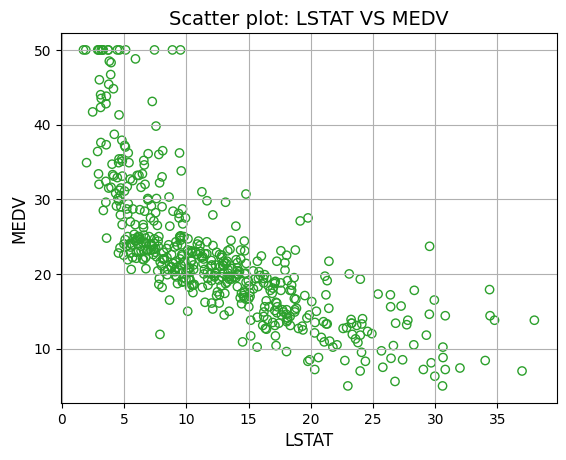

In [18]:
plt.figure()  # 创建一个新的图形窗口

plt.scatter(housing_df['LSTAT'], housing_df['MEDV'], color='C2', facecolor='none')  # 绘制散点图，x轴为'LSTAT'列，y轴为'MEDV'列，颜色为C2，边框颜色为无填充

plt.xlabel('LSTAT', fontsize=12)  # 设置x轴标签为'LSTAT'，字体大小为12
plt.ylabel('MEDV', fontsize=12)  # 设置y轴标签为'MEDV'，字体大小为12
plt.title('Scatter plot: LSTAT VS MEDV', fontsize=14)  # 设置图表标题为'Scatter plot: LSTAT VS MEDV'，字体大小为14

plt.grid(True)  # 显示网格线
plt.show()  # 显示图表


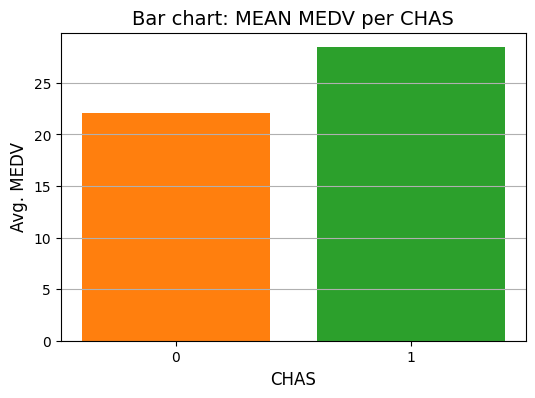

In [19]:
#Bar chart showing mean MEDV for each category of CHAS
#using Matplotlib
mean_medv_per_chas = housing_df.groupby('CHAS').mean().MEDV
# 计算每个CHAS类别下的'MEDV'的平均值，并存储在mean_medv_per_chas变量中

plt.subplots(figsize=(6, 4))  # 创建一个6x4英寸大小的图形窗口

plt.bar(mean_medv_per_chas.index, mean_medv_per_chas, color=['C1', 'C2'])
# 绘制条形图，x轴为CHAS的索引，y轴为mean_medv_per_chas的值，颜色为C1和C2

plt.xticks([0, 1], labels=['0', '1'])  # 设置x轴刻度为[0, 1]，标签为['0', '1']
plt.xlabel('CHAS', fontsize=12)  # 设置x轴标签为'CHAS'，字体大小为12
plt.ylabel('Avg. MEDV', fontsize=12)  # 设置y轴标签为'Avg. MEDV'，字体大小为12
plt.title('Bar chart: MEAN MEDV per CHAS', fontsize=14)
# 设置图表标题为'Bar chart: MEAN MEDV per CHAS'，字体大小为14

plt.grid(axis='y')  # 显示y轴上的网格线

plt.show()  # 显示图表


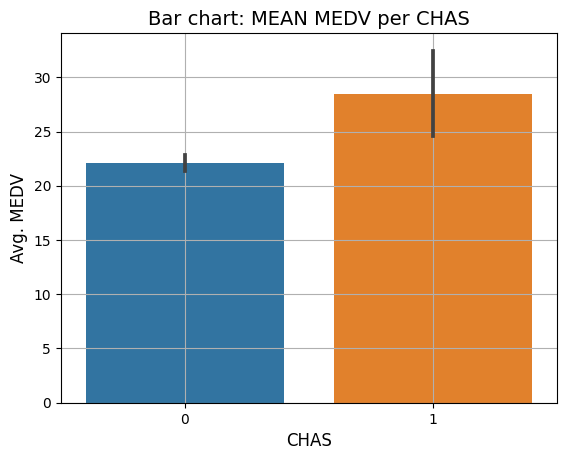

In [20]:
#Bar plot using seaborn
import seaborn as sns
import numpy as np

sns.barplot(x='CHAS', y='MEDV', data=housing_df, estimator=np.mean)
# 使用seaborn绘制条形图，x轴为'CHAS'，y轴为'MEDV'，数据为housing_df，估计器为平均值

plt.xlabel('CHAS', fontsize=12)  # 设置x轴标签为'CHAS'，字体大小为12
plt.ylabel('Avg. MEDV', fontsize=12)  # 设置y轴标签为'Avg. MEDV'，字体大小为12
plt.title('Bar chart: MEAN MEDV per CHAS', fontsize=14)
# 设置图表标题为'Bar chart: MEAN MEDV per CHAS'，字体大小为14

plt.grid(axis='y')  # 显示y轴上的网格线
plt.grid(axis='x')  # 显示x轴上的网格线

plt.show()  # 显示图表



#Distribution plots

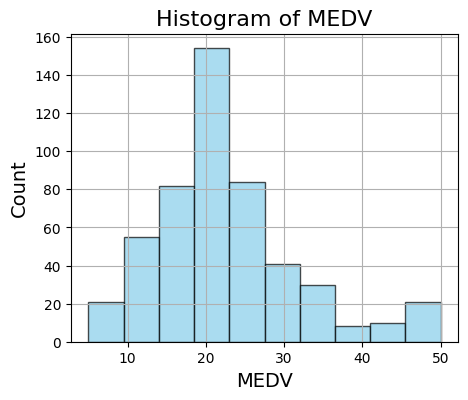

In [21]:
plt.subplots(figsize=(5, 4))  # 创建一个5x4英寸大小的图形窗口

plt.hist(housing_df['MEDV'], color='skyblue', edgecolor='black', alpha=0.7)
 # 绘制直方图，数据为'MEDV'列，颜色为天蓝色，边缘颜色为黑色，透明度为0.7

plt.xlabel('MEDV', fontsize=14)  # 设置x轴标签为'MEDV'，字体大小为14
plt.ylabel('Count', fontsize=14)  # 设置y轴标签为'Count'，字体大小为14
plt.title('Histogram of MEDV', fontsize=16)  # 设置图表标题为'Histogram of MEDV'，字体大小为16

plt.grid(True)  # 显示网格线

plt.show()  # 显示图表


#Bot plot

<Figure size 600x400 with 0 Axes>

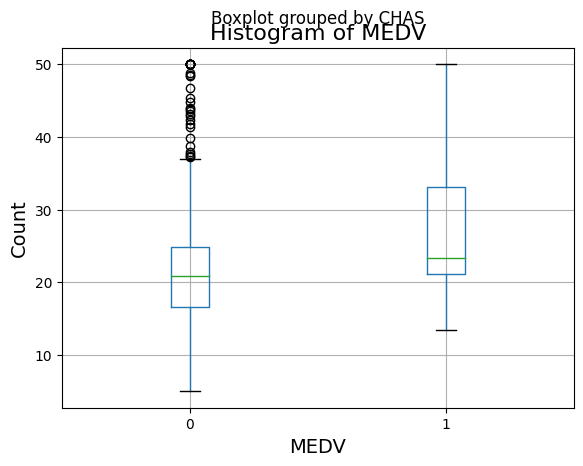

In [22]:
plt.figure(figsize=(6, 4))  # 创建一个6x4英寸大小的图形窗口

housing_df.boxplot(column='MEDV', by='CHAS', grid=True)
# 绘制箱线图，横轴为'MEDV'，按'CHAS'进行分组，显示网格线

plt.xlabel('MEDV', fontsize=14)  # 设置x轴标签为'MEDV'，字体大小为14
plt.ylabel('Count', fontsize=14)  # 设置y轴标签为'Count'，字体大小为14
plt.title('Histogram of MEDV', fontsize=16)
# 设置图表标题为'Histogram of MEDV'，字体大小为16

plt.show()  # 显示图表


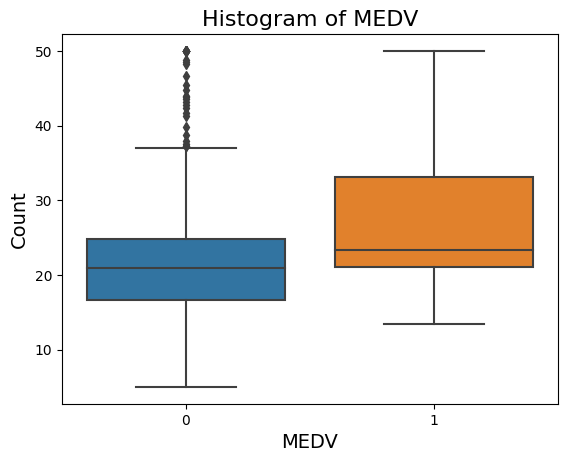

In [23]:
sns.boxplot(x='CHAS', y='MEDV', data=housing_df)
# 使用seaborn绘制箱线图，x轴为'CHAS'，y轴为'MEDV'，数据为housing_df

plt.xlabel('MEDV', fontsize=14)  # 设置x轴标签为'MEDV'，字体大小为14
plt.ylabel('Count', fontsize=14)  # 设置y轴标签为'Count'，字体大小为14
plt.title('Histogram of MEDV', fontsize=16)
# 设置图表标题为'Histogram of MEDV'，字体大小为16

plt.show()  # 显示图表


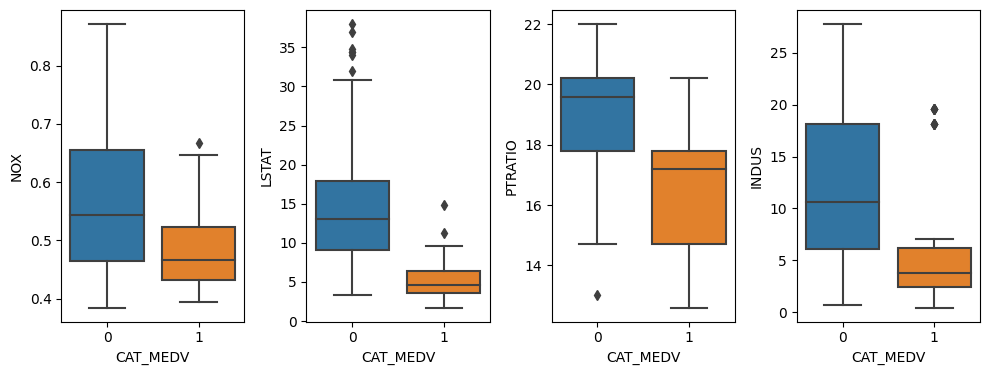

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))
# 创建一个1行4列的图形窗口，大小为10x4英寸，返回图形对象和子图对象

sns.boxplot(y='NOX', x='CAT_MEDV', data=housing_df, ax=axes[0])
# 在第一个子图中绘制y轴为'NOX'，x轴为'CAT_MEDV'的箱线图，数据为housing_df
sns.boxplot(y='LSTAT', x='CAT_MEDV', data=housing_df, ax=axes[1])  # 在第二个子图中绘制y轴为'LSTAT'，x轴为'CAT_MEDV'的箱线图，数据为housing_df
sns.boxplot(y='PTRATIO', x='CAT_MEDV', data=housing_df, ax=axes[2])  # 在第三个子图中绘制y轴为'PTRATIO'，x轴为'CAT_MEDV'的箱线图，数据为housing_df
sns.boxplot(y='INDUS', x='CAT_MEDV', data=housing_df, ax=axes[3])  # 在第四个子图中绘制y轴为'INDUS'，x轴为'CAT_MEDV'的箱线图，数据为housing_df

for ax in axes:
    ax.set_xlabel('CAT_MEDV')  # 设置x轴标签为'CAT_MEDV'
    plt.suptitle('')  # 清空总标题
    plt.tight_layout()  # 调整子图之间的间距

plt.show()  # 显示图表
